# Project for Fundamentals for Data Analysis
This project requires the user to perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle [1].<br>
The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

### References
[1] https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv <br>
[2] https://numpy.org/ <br>
[3] https://pandas.pydata.org/pandas-docs/stable/index.html <br>
[4] https://seaborn.pydata.org/generated/seaborn.scatterplot.html <br>
[5] http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200) <br>
[6] https://en.wikipedia.org/wiki/Nonlinear_regression#:~:text=In%20statistics%2C%20nonlinear%20regression%20is,a%20method%20of%20successive%20approximations. <br>
[7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html <br>
[8] https://en.wikipedia.org/wiki/Non-linear_least_squares
[9] https://hernandis.me/2020/04/05/three-examples-of-nonlinear-least-squares-fitting-in-python-with-scipy.html<br>
[10]https://scipy-cookbook.readthedocs.io/items/robust_regression.html



In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
# import the data set from Moodle and covert it to a data frame
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df=pd.read_csv(url)
df    

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [104]:
x = df["speed"]
y = df["power"]

<AxesSubplot:xlabel='speed', ylabel='power'>

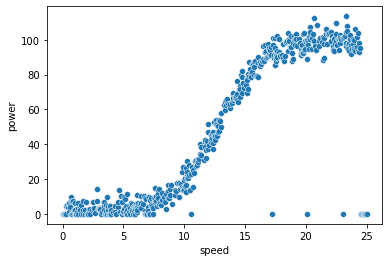

In [105]:
import seaborn as sns

# visualise the data using a scatterplot [5]
sns.scatterplot(data=df, x="speed", y="power")

## Initial Visual Analysis
The scatterplot above shows that there is a relatively low Power output (represented on the y axis) while the Speed is at values between 0 and 10 (x axis). However when Speed increases above 10 there is a noticable increase in Power.  This continues up until Speed reaches about 17 and Power levels off while Speed continues to increase up to 25.<br>
It is also worth nothing that a smaller number of data points between 10 and 25 on the x axis have corresponding y values equal to 0. This does not fit the visual trend of the rest of the data and may indicate outliers that may be due to measurement errors. This would need further investigation as it will likely bias any statistical analysis carried out. 

[  4.91759567 -13.89990263]


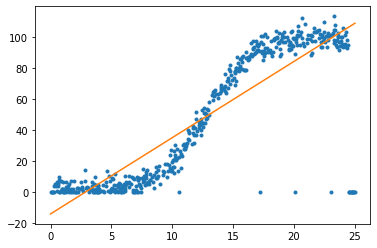

In [106]:
# to complete a simple linear regression using polyfit in Matplotlib
# first plot the data points
plt.plot(x, y, ".", label="Wind Turbine Output")

#then determine the coefficients
coeffs = np.polyfit(x, y, 1)
print(coeffs)
# polyfit returns the numbers that describes the line that is the best fit for the data
# so we can use the equation y = a*x + b to produce this line
y_bestfit = coeffs[0]*x + coeffs[1]
plt.plot(x, y_bestfit, label= "Best fit line")


## Visual Analysis
So we can see that the best fit line created here to represent simple linear regression doesn't actually fit the data. Almost half of the data is curved under the line up until speed reaches approximately 17 which may indicate an overestimate of the fit. While most of the data for Power output above speed of 17 is over the line indicating a underestimate of the fit. <br>
A simple linear regression does not fit the data in this data set! <br>
I am curious if we excluded the data when Power is equal to 0 would we see a different representation.


In [107]:
#lets ignore the data where Power is equal to 0 and filter this out of the Data Frame
new_df=df[df["power"]>0]
new_df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


[  5.61882784 -19.83768545]


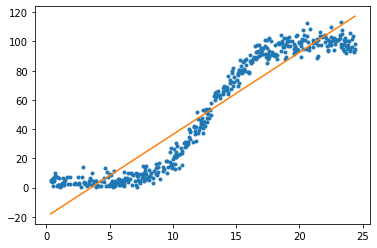

In [108]:
new_x = new_df["speed"]
new_y = new_df["power"]

plt.plot(new_x, new_y, ".", label="Wind Turbine Output_Revised")

#then determine the coefficients
new_coeffs = np.polyfit(new_x, new_y, 1)
print(new_coeffs)
# polyfit returns the numbers that describes the line that is the best fit for the data
# so we can use the equation y = a*x + b to produce this line
new_y_bestfit = new_coeffs[0]*new_x + new_coeffs[1]
plt.plot(new_x, new_y_bestfit, label= "Best fit line_Revised")

## Visual nalysis here suggests no real change
So removing the data points where the power is equal to 0, removes 49 data points (just under 10% of the data) but does not significantly change the structure of plot based on visual analysis.<br>  We can see that the simple linear regression does not fit well with this data. Instead nonlinear regression may be more appropriate. Nonlinear regression can be described as a "_form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations_" [6]. 

***
## Nonlinear Regression
So it is possible to fit a curve to data using SciPy [7] and this can be used to represent nonlinear regression. <br>
Non-linear least squares is the form of least squares analysis that is used to fit a set of m observations with a model that is non-linear in n unknown parameters (m ≥ n) [8]. The basis of the method is to approximate the model by a linear one and to refine the parameters by successive iterations. There are many similarities to linear least squares, but also some significant differences [8].



In [64]:
# Use non-linear least squares to fit a function, f, to data [7 & 9].

from scipy.optimize import least_squares
#inital attempt
#def func(x, a, b, c):
 #   return a * np.exp(-b * x) + c

In [89]:
def y(theta, t):
    return theta[0] / (1 + np.exp(- theta[1] * (t - theta[2])))

ts = np.linspace(0, 1)
K = 1; r = 10; t0 = 0.5; noise = 0.1
ys = y([K, r, t0], ts) + noise * np.random.rand(ts.shape[0])

def fun(theta):
    return y(theta, ts) - ys

theta0 = [1,2,3]
res1 = least_squares(fun, theta0)
type(res1)
#plt.plot(res1, label= "test")

scipy.optimize.optimize.OptimizeResult

In [94]:
ts = np.linspace(0, 100, 100)
K = 1400; r = 0.1; t0 = 50; noise = 50
ys = y([K, r, t0], ts) + noise * (np.random.rand(ts.shape[0]) - 0.5)

# only this time we only use the first 50% of the data
train_limit = 50 # out of 100 datapoints
def fun(theta):
    return y(theta, ts[:train_limit]) - ys[:train_limit]

# run the parameter estimation again
theta0 = [1000, 0.1, 30]
res4 = least_squares(fun, theta0)

# predict the values for the rest of the epidemic
predict = y(res4.x, ts[train_limit:])
mspe = ((ys[train_limit:] - predict) ** 2).mean()
type(predict)
#plt.plot(predict, mspe, label = "test")

numpy.ndarray

In [52]:
#xdata = np.linspace(0, 4, 50)
#y = func(xdata, 2.5, 1.3, 0.5)
#np.random.seed(1729)
#y_noise = 0.2 * np.random.normal(size=xdata.size)
#ydata = y + y_noise
#plt.plot(xdata, ydata, 'b-', label='data')

In [99]:
xdata = df["speed"]
ydata = df["power"]
type(ydata)

pandas.core.series.Series

In [95]:
# Fit for the parameters a, b, c of the function func:

#popt, pcov = curve_fit(func, xdata, ydata)
#popt

In [96]:
#plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
#popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
#popt
#plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
#plt.show()

IndentationError: unexpected indent (<ipython-input-96-995c91cc9336>, line 2)

In [97]:
# real data
ts = np.linspace(0, 100, 100)
K = 1400; r = 0.1; t0 = 50; noise = 50
ys = y([K, r, t0], ts) + noise * (np.random.rand(ts.shape[0]) - 0.5)

# again, we only use the first 50% of the data
train_limit = 50 # out of 100 datapoints
def fun(theta):
    return y(theta, ts[:train_limit]) - ys[:train_limit]

# run the parameter estimation
theta0 = [1000, 0.1, 30]
res5 = least_squares(fun, theta0)

# use the residuals to estimate the error distribution
eps = res5.fun

# residual resampling
M = 500 # number of resamples
theta_est = []
for _ in range(M):
    # generate synthetic sample
    fit_ys = y(res5.x, ts[:train_limit])
    np.random.default_rng().shuffle(eps)
    synthetic_ys = fit_ys + eps
    
    # fit the model again
    res = least_squares(lambda theta: y(theta, ts[:train_limit]) - synthetic_ys[:train_limit], theta0)
    theta_est.append(res.x)

Ks, rs, t0s = np.array(theta_est).transpose()

K = 1176 (1046, 1343), r = 0.106, t0 = 47


<ipython-input-98-d2924d90cb68>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


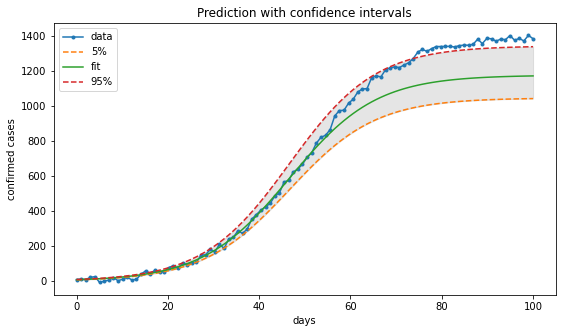

In [98]:
K05, K95 = np.quantile(Ks, [0.05, 0.95])
K = Ks.mean()
r = rs.mean()
t0 = t0s.mean()

y05 = y([K05, r, t0], ts)
y95 = y([K95, r, t0], ts)
print(f'K = {K:.0f} ({K05:.0f}, {K95:.0f}), r = {r:.3f}, t0 = {t0:.0f}')

fig = plt.figure(figsize = (9, 5))
ax = fig.add_subplot(111)
ax.plot(ts, ys, '.-', label = 'data')
ax.plot(ts, y05, '--', label = '5%')
ax.plot(ts, y([K, r, t0], ts), label = 'fit')
ax.plot(ts, y95, '--', label = '95%')
ax.fill_between(ts, y05, y95, alpha = 0.2, color = 'gray')
ax.set_xlabel('days')
ax.set_ylabel('confirmed cases')
ax.set_title('Prediction with confidence intervals')
ax.legend()

fig.show()

The three parameters in the function are:

K, the supremum of y (suggested to think of this as a maximum that is achieved when t = \inftyt=∞),


In [100]:
# real data
ts = np.linspace(0, 100, 100)
K = 1400; r = 0.1; t0 = 50; noise = 50
ys = y([K, r, t0], ts) + noise * (np.random.rand(ts.shape[0]) - 0.5)

# again, we only use the first 50% of the data
train_limit = 50 # out of 100 datapoints
def fun(theta):
    return y(theta, ts[:train_limit]) - ys[:train_limit]

# run the parameter estimation
theta0 = [1000, 0.1, 30]
res5 = least_squares(fun, theta0)

# use the residuals to estimate the error distribution
eps = res5.fun

# residual resampling
M = 500 # number of resamples
theta_est = []
for _ in range(M):
    # generate synthetic sample
    fit_ys = y(res5.x, ts[:train_limit])
    np.random.default_rng().shuffle(eps)
    synthetic_ys = fit_ys + eps
    
    # fit the model again
    res = least_squares(lambda theta: y(theta, ts[:train_limit]) - synthetic_ys[:train_limit], theta0)
    theta_est.append(res.x)

Ks, rs, t0s = np.array(theta_est).transpose()

K = 1726 (1346, 2298), r = 0.092, t0 = 54


<ipython-input-101-d2924d90cb68>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


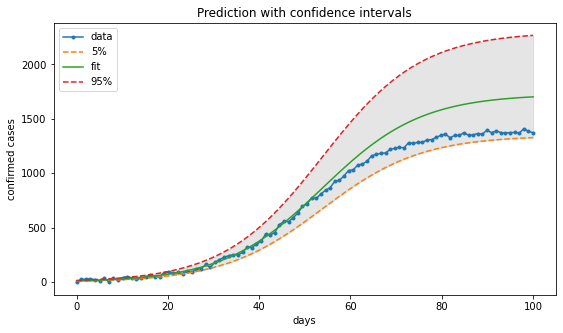

In [101]:
K05, K95 = np.quantile(Ks, [0.05, 0.95])
K = Ks.mean()
r = rs.mean()
t0 = t0s.mean()

y05 = y([K05, r, t0], ts)
y95 = y([K95, r, t0], ts)
print(f'K = {K:.0f} ({K05:.0f}, {K95:.0f}), r = {r:.3f}, t0 = {t0:.0f}')

fig = plt.figure(figsize = (9, 5))
ax = fig.add_subplot(111)
ax.plot(ts, ys, '.-', label = 'data')
ax.plot(ts, y05, '--', label = '5%')
ax.plot(ts, y([K, r, t0], ts), label = 'fit')
ax.plot(ts, y95, '--', label = '95%')
ax.fill_between(ts, y05, y95, alpha = 0.2, color = 'gray')
ax.set_xlabel('days')
ax.set_ylabel('confirmed cases')
ax.set_title('Prediction with confidence intervals')
ax.legend()

fig.show()